<div style="text-align: center">
<h1><font color="black" size=8>PROYECTO DE CONSOLIDACIÓN</font></h1>

<div style="text-align: left">
<h1><font color="#009D7F" size=5>Alejandro Santiago Bitria</font></h1>


Esto es lo que obtenemos de la empresa para analizar los datos:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
dataset = pd.read_csv("fifa_dataset.csv", error_bad_lines=False, index_col="Unnamed: 0")
bool_array = dataset["Value"] == "€0"
dataset = dataset.loc[-bool_array]
dataset_1 = dataset.iloc[:,:11]
dataset_2 = dataset.iloc[:,53:]

In [4]:
values = []
for value in dataset_1["Value"]:
  unit = value[-1]
  number = float(value[1:-1])
  if unit == "M":
    number = number*10**6
  if unit == "K":
    number = number*10**3
  values.append(number)
dataset_1["Value"] = values

# Ejercicio 1

Lo primero que se hará es unir los dataset disponibles (que llevan el nombre de **dataset_1** y **dataset_2**) en uno solo que se llamará **dataset_final**.

In [126]:
dataset_final = pd.concat([dataset_1, dataset_2], axis=1)

# Ejercicio 2

Procedo a mostrar los **15 mejores** y **15 peores** equipos atendiendo al **valor medio de sus jugadores** (`Overall`). 

In [8]:
# Hacemos primero la agrupación

grouped_df = dataset_final.groupby("Club").mean().reset_index()

# De toda la lista, cogemos tanto los mejores 15 equipos así como los 15 peores

sorted_group = grouped_df.sort_values("Overall", ascending=False)
high_values = sorted_group.iloc[:15, :]
lower_values = sorted_group.iloc[-15:, :]

Obtenemos que:

- Los **15 mejores equipos** son (ordenados de mejor a peor): Juventus, Napoli, Inter, Real Madrid, Milán, FC Barcelona, Paris Saint-Germain, Roma, Manchester United, FC Bayern München, SL Benfica, Chelsea, Manchester City, Tottenham Hotspur y FC Porto.

- Los **15 peores equipos** son (ordenados de mejor a peor): Macclesfield Towb, Newport County, Cork City, Tranmere Rovers, Stevenage, St. Patrick´s Athletic, Cambridge United, Waterford FC, Morecambe, Crewe Alexandra, Sligo Rovers, Derry City, Bohemian FC, Limerick FC y Bray Wanderers.

Para que quede visualmente representado, he usado un **gráfico de barras**. En el primero se muestran los 15 mejores ordenados ascendentemente de izquierda a derecha. En el segundo por el contrario aparecen reflejados los 15 peores equipos, también ordenados de manera ascendente de izquierda a derecha.

En caso de que quedaran dudas, he incluido el valor medio total de los jugadores encima de cada barra (que representa al equipo en cuestión) para que observen las diferencias de medias entre los diferentes equipos.

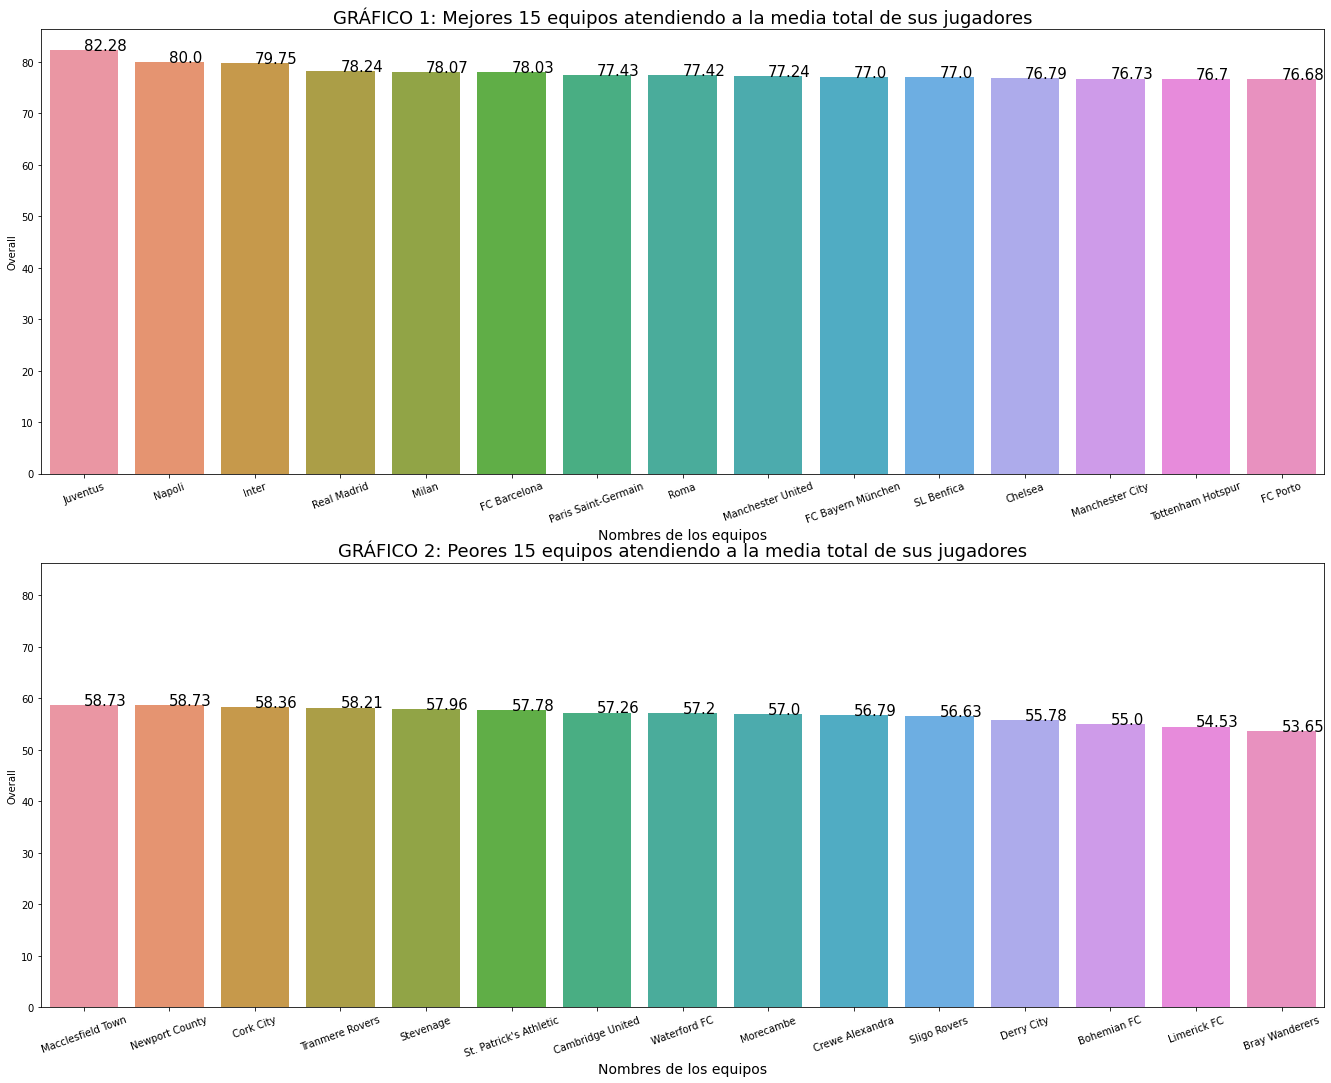

In [98]:
# Primero, hacemos el subplot

fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(23,18))

# Después colocamos en el subplot los dos gráficos de barras

ax = sns.barplot(ax=axes[0],data=high_values, x="Club", y="Overall")
ax1 = sns.barplot(ax=axes[1],data=lower_values, x="Club", y="Overall")

    # Colocamos tanto los títulos y nombres de los ejes de ambos gráficos

axis_dict = {"size": 14}
title_dict = {"size": 18}

ax.set_title("GRÁFICO 1: Mejores 15 equipos atendiendo a la media total de sus jugadores", fontdict=title_dict)
ax.set_xlabel("Nombres de los equipos", fontdict=axis_dict)
ax1.set_title("GRÁFICO 2: Peores 15 equipos atendiendo a la media total de sus jugadores", fontdict=title_dict)
ax1.set_xlabel("Nombres de los equipos", fontdict=axis_dict)


    # Finalmente, rotamos los nombres de los clubes y colocamos el valor medio total de los jugadores encima de cada barra

values_dict = {"size": 15}

labels_high_values = axes[0].get_xticklabels()
_=axes[0].set_xticklabels(labels_high_values, rotation = 20)
for i, value in enumerate(high_values["Overall"]):
    axes[0].text(i, value, str(round(value,2)), fontdict= values_dict)
    
labels_lower_values = axes[1].get_xticklabels()
_ = axes[1].set_xticklabels(labels_lower_values, rotation = 20)
for i, value in enumerate(lower_values["Overall"]):
    axes[1].text(i, value, str(round(value, 2)), fontdict= values_dict)

Para **maximizar los beneficios**, se deberían incluir con más frecuencia jugadores procedentes de los equipos del **segundo gráfico**. De esta manera, el jugador/a quedarán insatisfechos por el jugador que les ha tocado y decidirán comprar más sobres con la intención de que consigan un jugador procedente **del primer gráfico**, que por consiguiente deberían aparecer con menor frecuencia.

# Ejercicio 3

Los diferentes aspectos de un jugador en la vida real se reflejan en distintas variables que el juego aplica al deportista. Por ello, voy a comprobar con este **mapa de calor** si existe alguna relación entre las las variables de **Precisión con la cabeza** (`HeadingAccuracy`), **Salto** (`Jumping`), **Agilidad** (`Agility`), **Tiempo de reacción** (`Reaction`) y **Visión** (`Vision`). 

Ponemos como valor mínimo de correlación el **0,8 de 1** para poder afirmar que una de las variables mencionadas **puede sustituir a otra**. Concretamente queremos saber si hay alguna variable que pueda sustituir a `HeadingAccuracy`.

In [144]:
# Filtramos las variables elegidas entre todo el conjunto de datos

filtered_df = dataset_final.loc[:,["HeadingAccuracy", "Jumping", "Agility", "Reactions", "Vision"]]
corr = filtered_df.corr()

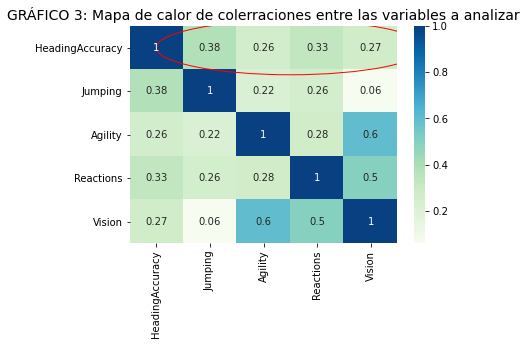

In [148]:
# Una vez conseguida esta nueva lista, lo representamos con el mapa de calor para ver las distintas correlaciones

ax = sns.heatmap(corr, cmap = "GnBu", annot = True)

    # Insertamos el título
    
title_dict = {"size": 14}
ax.set_title("GRÁFICO 3: Mapa de calor de colerraciones entre las variables a analizar", fontdict=title_dict)

    # Resaltamos el área de la gráfica para la respuesta con un círculo blanco

x_radius = 5
x_axis = ax.get_xlim()
y_axis = ax.get_ylim()
x_width = x_axis[0]-x_axis[1]
y_height = y_axis[0]-y_axis[1]
y_radius = x_radius*(y_height/x_width)*(0.5/2)


a = patches.Ellipse((3, 0.5), x_radius, y_radius, fill=False, color="red")
_ = ax.add_patch(a)

Partiendo de la leyenda que aparece a la aparece a la derecha del mapa de calor, podemos observar que **no hay ninguna correlación que sea igual o mayor que 0,8**. Por tanto, no hay ninguna variable que pueda sustituir a `HeadingAccuracy`en caso de eliminarla (debería tener colores claros y son oscuros como se ven en los cuadrados rodeados por el círculo rojo). Aunque no se pregunta directamente, añado que el valor de correlación más alto, el cual ronda el 0,6, lo encontramos entre las variables `Agility` y `Vision`, pero al no llegar al valor mínimo planteado **no podemos afirmar que una de estas variables pueda sustituir a otra**.

# Ejercicio 4 y 5

Se ha solicitado investigar si hay algún jugador que destaque fuera de la media (a partir de ahora lo llamaremos **outlier**) desde el punto de vista de su **Valor de mercado** (`Value`) y **Comportamiento global** (`Overall`) de cuatro países en concreto: **Argentina**, **España** (`Spain`), **Inglaterra** (`England`) y **Suecia** (`Sweden`).

In [139]:
# Inicialmente hacemos una lista que incluya solo los países solicitados

bool_array = dataset_final["Nationality"].isin(["Argentina","Spain","England","Sweden"])
filtered_df = dataset_final.loc[bool_array]

In [140]:
# Comprobamos que efectivamente la nueva lista incluye solo los 4 países que necesitamos

filtered_df["Nationality"].unique()

array(['Argentina', 'Spain', 'England', 'Sweden'], dtype=object)

In [97]:
# Buscamos qué jugadores son outlier dentro de los países seleccionados en relacións a su Valor de mercado

filtered_df.sort_values("Value",ascending=False).head(45)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M


In [84]:
# Buscamos qué jugadores son outlier dentro de los países selecionados en relación a su Comportamiento global

filtered_df.sort_values("Overall",ascending=False).head(45)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
30,197781,Isco,26,https://cdn.sofifa.org/players/4/19/197781.png,Spain,https://cdn.sofifa.org/flags/45.png,88,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,https://cdn.sofifa.org/teams/2/light/47.png,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN


De estas dos listas ordenadas generadas podemos sacar que, por un lado, desde el punto de vista de **Valor de mercado** o `Value` destacan estos jugadores como outliers:

- Argentina: **Lionel Messi** 

<img width="100px" src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Lionel_Messi_20180626.jpg/368px-Lionel_Messi_20180626.jpg></img>

- España: **Isco y David de Gea** (están prácticamente empatados)

<img width="150px" src=https://www.elfutbolero.es/__export/1618397940566/sites/elfutboleromx/img/2021/04/14/isco_alarcon.jpg_1169307048.jpg></img>
<img width="150px" src=https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2018/05/09/15258733026523.jpg></img>


- Inglaterra: **Harry Kane**

<img width="160px" src=https://www.ecuavisa.com/binrepository/768x432/0c0/0d0/none/11705/URNL/skysports-harry-kane-tottenham_4552898_EC480656_MG860025.jpg></img>

- Suecia: **Emil Forsberg**

<img width="125px" src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/UEFA_EURO_qualifiers_Sweden_vs_Spain_20191015_Emil_Forsberg_5.jpg/368px-UEFA_EURO_qualifiers_Sweden_vs_Spain_20191015_Emil_Forsberg_5.jpg></img>

Por otro lado, en caso de centrarse en **Comportamiento global** u `Overall`, resaltan los siguientes jugadores:

- Argentina: **Lionel Messi**

<img width="100px" src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Lionel_Messi_20180626.jpg/368px-Lionel_Messi_20180626.jpg></img>

- España: **Sergio Ramos**

<img width="100px" src=https://upload.wikimedia.org/wikipedia/commons/4/43/Russia-Spain_2017_%286%29.jpg></img>

- Inglaterra: **Harry Kane**

<img width="160px" src=https://www.ecuavisa.com/binrepository/768x432/0c0/0d0/none/11705/URNL/skysports-harry-kane-tottenham_4552898_EC480656_MG860025.jpg></img>


- Suecia: **Zlatan Ibrahimović y Emil Forsberg**

<img width="100px" src=https://s.hs-data.com/bilder/spieler/gross/1274.jpg></img>
<img width="125px" src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/UEFA_EURO_qualifiers_Sweden_vs_Spain_20191015_Emil_Forsberg_5.jpg/368px-UEFA_EURO_qualifiers_Sweden_vs_Spain_20191015_Emil_Forsberg_5.jpg></img>

Para visualizarlo mejor, vamos a proyectar estos resultados en **dos gráficas boxplot** (una para `Value` y otra para `Overall`)

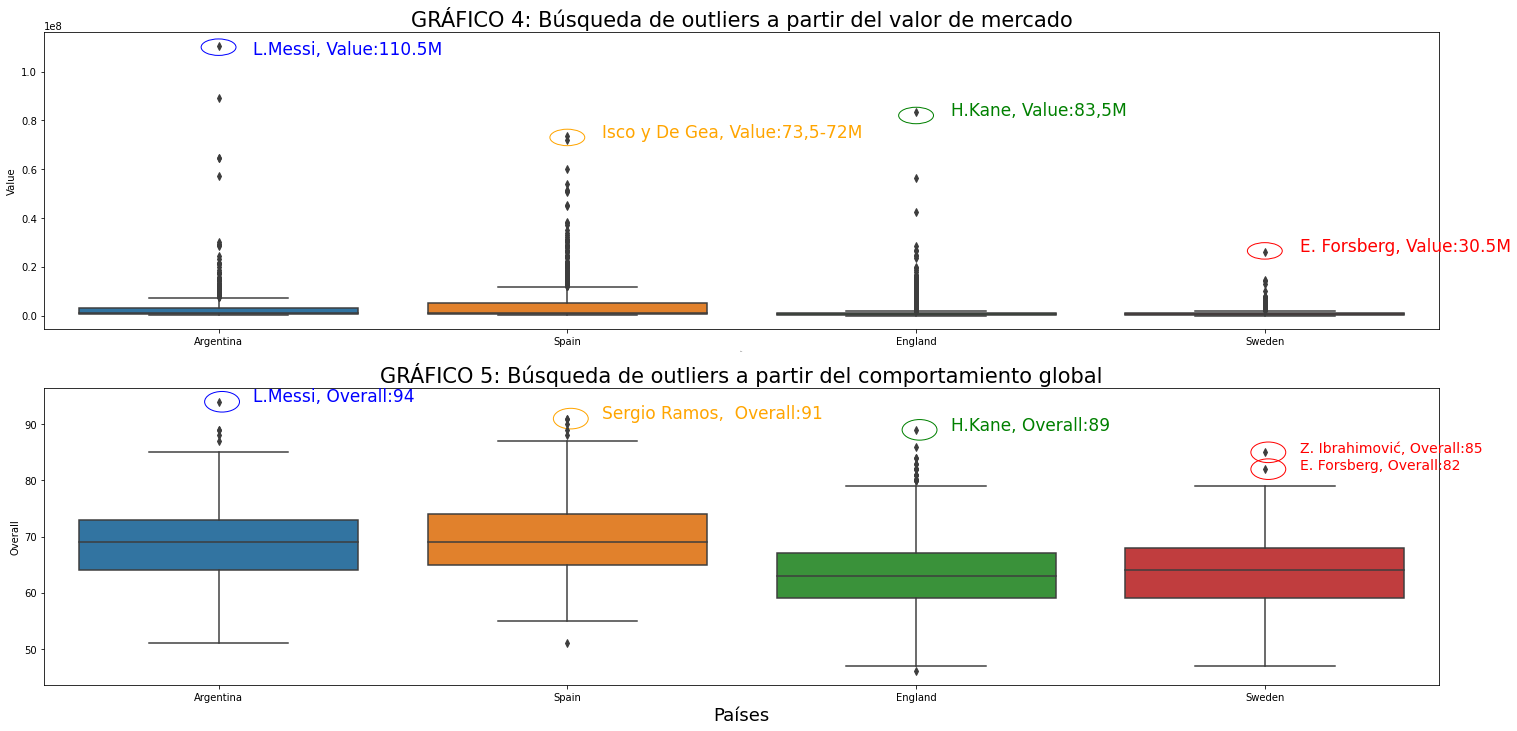

<Figure size 1440x648 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

In [141]:
# Realizamos el subplot para representar los dos boxplot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,12))

# Realizamos el gráfico boxplot de Valor de mercado

plt.figure(figsize=(20,9))
sns.boxplot(ax = axes[0],data=filtered_df, y="Value", x="Nationality")

# Realizamos el gráfico boxplot de Comportamiento global

plt.figure(figsize=(25,12))
sns.boxplot(ax = axes[1],data=filtered_df, y="Overall", x="Nationality")

# Insertamos título e indicamos el texto de ambas gráficas


          # Primero del primer gráfico
    
title_dict = {"size": 21}
axis_dict = {"size": 0}
axes[0].set_xlabel("Países", fontdict=axis_dict) 
axes[0].set_title("GRÁFICO 4: Búsqueda de outliers a partir del valor de mercado", fontdict=title_dict)
fontdict = {"color": "blue", "size":17}
axes[0].text(0.1, 107000000, "L.Messi, Value:110.5M", fontdict = fontdict)
fontdict = {"color": "orange", "size":17}
axes[0].text(1.1, 73000000, "Isco y De Gea, Value:73,5-72M",fontdict = fontdict)
fontdict = {"color": "green", "size":17}
axes[0].text(2.1, 82000000, "H.Kane, Value:83,5M", fontdict = fontdict)
fontdict = {"color": "red", "size":17}
axes[0].text(3.1, 26500000, "E. Forsberg, Value:30.5M", fontdict = fontdict)

         # Luego del segundo gráfico
    
axis_dict = {"size": 18}
axes[1].set_xlabel("Países", fontdict=axis_dict)  

axes[1].set_title("GRÁFICO 5: Búsqueda de outliers a partir del comportamiento global", fontdict=title_dict)

fontdict = {"color": "blue", "size":17}
axes[1].text(0.1, 94, "L.Messi, Overall:94", fontdict = fontdict)
fontdict = {"color": "orange", "size":17}
axes[1].text(1.1, 91, "Sergio Ramos,  Overall:91",fontdict = fontdict)
fontdict = {"color": "green", "size":17}
axes[1].text(2.1, 89, "H.Kane, Overall:89", fontdict = fontdict)
fontdict = {"color": "red", "size":14}
axes[1].text(3.1, 85, "Z. Ibrahimović, Overall:85", fontdict = fontdict)
axes[1].text(3.1, 82, "E. Forsberg, Overall:82", fontdict = fontdict)

# Procedemos a rodear los jugadores destacados de ambas gráficas

        # Primero del primer gráfico
    
x_radius = 0.1
x_axis = axes[0].get_xlim()
y_axis = axes[0].get_ylim()
x_width = x_axis[1]-x_axis[0]
y_height = y_axis[1]-y_axis[0]
y_radius = x_radius*(y_height/x_width)*(20/9)

a = patches.Ellipse((0,110000000), x_radius, y_radius, fill=False, color="blue")
b = patches.Ellipse((1,73000000), x_radius, y_radius, fill=False, color="orange")
c = patches.Ellipse((2,82000000), x_radius, y_radius, fill=False, color="green")
d = patches.Ellipse((3,26500000), x_radius, y_radius, fill=False, color="red")
_ = axes[0].add_patch(a)
_ = axes[0].add_patch(b)
_ = axes[0].add_patch(c)
_ = axes[0].add_patch(d)


        # Luego del segundo gráfico
        
x_radius = 0.1
x_axis = axes[1].get_xlim()
y_axis = axes[1].get_ylim()
x_width = x_axis[1]-x_axis[0]
y_height = y_axis[1]-y_axis[0]
y_radius = x_radius*(y_height/x_width)*(25/9)

a = patches.Ellipse((0.01,94), x_radius, y_radius, fill=False, color="blue")
b = patches.Ellipse((1.01,91), x_radius, y_radius, fill=False, color="orange")
c = patches.Ellipse((2.01,89), x_radius, y_radius, fill=False, color="green")
d = patches.Ellipse((3.01,85), x_radius, y_radius, fill=False, color="red")
e = patches.Ellipse((3.01,82), x_radius, y_radius, fill=False, color="red")
_ = axes[1].add_patch(a)
_ = axes[1].add_patch(b)
_ = axes[1].add_patch(c)
_ = axes[1].add_patch(d)
_ = axes[1].add_patch(e)

La **conclusión** de este análisis es similar a la mencionada en el GRÁFICO 1 y GRÁFICO 2: si se quiere maximizar el beneficio los mejores jugadores deben aparecer con menos frecuencia. 

En el caso del `Value`los outliers son Lionel Messi, Isco y David de Gea, Harry Kane y Emil Forsberg en Argentina, España, Inglaterra y Suecia respectivamente. No obstante, se observa que en el **caso particular** de Suecia el valor de mercado de su jugador destacable distancia considerablemente de los otros 3 países en comparación (también en términos generales). Resulta por tanto mucho más fácil aislar a Emil Forsberg pues en el resto de países hay muchos más jugadores con valores de mercado superiores. Resaltar que Lionel Messi destaca sobre el resto **al tener un valor de mercado superior a los 100 millones**, por lo que incluso sería más extraño que apareciera en los sobres de Ultimate Team respecto al resto de jugadores.

Para el `Overall` vuelven a repetir como outlier Lionel Messi y Harry Kane en Argentina e Inglaterra respectivamente. En el caso español el outlier es Sergio Ramos mientras que en Suecia es Zlatan Ibrahimović. Sin embargo, hay jugadores muy similares a Sergio Ramos como **David de Egea** o **David Silva** que le siguen muy cerca por lo que también recomiendo tenerlos en cuenta para la rareza de los sobres. Se vuelve a repetir ese **caso particular** comentado de Suecia, pues tan solo dos jugadores destacan: el mencionado Zlatan Ibrahimović y Emil Forsberg. Por consiguiente, tan sólo sería extraño que aparecieran esos 2 jugadores en los sobres si nos centramos en el mercado sueco (aunque considerando que Emil Forsberg es mejor al salir como outliner en las dos gráficas).

Si **juntáramos ambas variables**, claramente la probabilidad de rareza debería ser más alta tanto para Harry Kane como para Lionel Messi, **destacando éste último** por lo ya explicado anteriormente. 

# Ejercicio 6

Con el GRÁFICO 4 hemos comentado aquellos jugadores que destacan por encima del resto en cuanto a **Valor de mercado** o `Value`. Pues bien, ahora interesa saber **ese reparto de valor de mercado de los jugadores** pero exclusivamente de **Argentina y Suecia**. Para visualizarlo gráficamente, emplearemos un **histograma**.

In [133]:
# Hacemos una lista con solo esos dos países

bool_array2 = dataset_final["Nationality"].isin(["Argentina","Sweden"])
filtered_df = dataset_final.loc[bool_array2]

Text(0.5, 1.0, 'GRÁFICO 6: Reparto de valor de los jugadores en Argentina y Suecia')

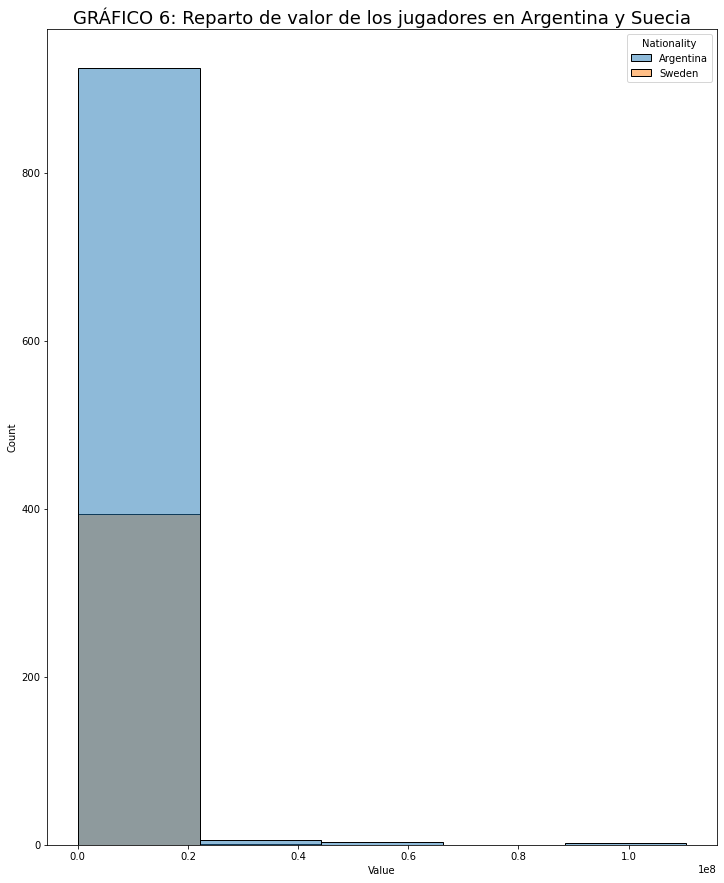

In [137]:
# Construimos el histograma

plt.figure(figsize= (12,15))
ax = sns.histplot(data= filtered_df, x="Value", hue="Nationality", bins = 5)

   # Colocamos el título al gráfico

title_dict = {"size": 18}
ax.set_title("GRÁFICO 6: Reparto de valor de los jugadores en Argentina y Suecia", fontdict=title_dict)

Como ya quedaba constatado a la hora de analizar los 4 países respecto al valor de mercado, se aprecia que claramente **Argentina tiene dinero por encima de la media**. Por ende, si entre estos dos países hubiera que elegir uno que apareciera con menor frecuencia en los sobres de Ultimate Team, éste debería ser **Argentina**.

# Ejercicio 7 y 8

A continuación se nos pide encontrar algún outlier que destaque entre las características de **Agilidad** (`Agility`) y **Poder de disparo** (`ShotPower`). Como la muestra sería muy grande, me he centrado en los jugadores pertenecientes a los 15 mejores equipos (Véase GRÁFICA 1). Para ello usaremos un **gráfico de nubes de puntos**.

In [142]:
# Hacemoso una lista centrándonos solamente en los jugadores de los 15 mejores equipos

clubs = high_values["Club"].unique()
bool_array3 = dataset_final['Club'].isin(clubs)
filtered_df = dataset_final.loc[bool_array3]

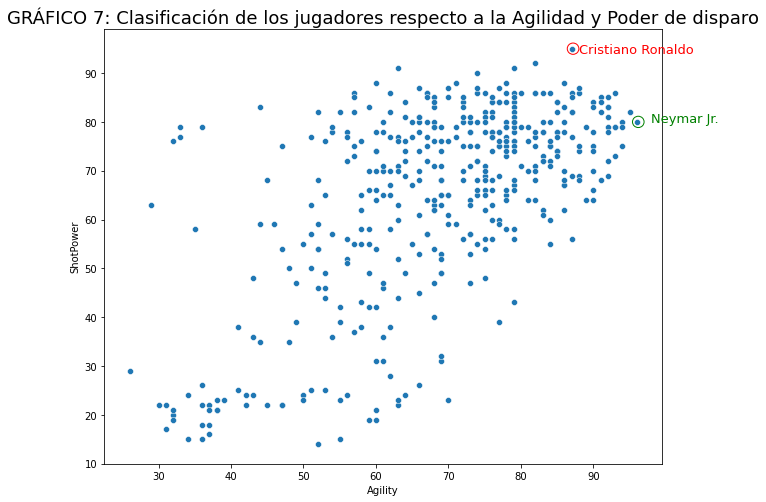

In [143]:
# Se configura el gráfico de nube de puntos

plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=filtered_df, x="Agility", y="ShotPower")

      # Se añaden el título del gráfico y los textos de los outlier
    
title_dict = {"size": 18}
ax.set_title("GRÁFICO 7: Clasificación de los jugadores respecto a la Agilidad y Poder de disparo", fontdict=title_dict)
fontdict = {"color": "red", "size":13}
ax.text(88, 94, "Cristiano Ronaldo", fontdict = fontdict)
fontdict = {"color": "green", "size":13}
ax.text(98, 80, "Neymar Jr.", fontdict = fontdict)

      # Se añaden los círculos para señalar los outlier

x_radius = 1.6
x_axis = ax.get_xlim()
y_axis = ax.get_ylim()
x_width = x_axis[0]-x_axis[1]
y_height = y_axis[0]-y_axis[1]
y_radius = x_radius*(y_height/x_width)*(10/8)


a = patches.Ellipse((87.2, 95), x_radius, y_radius, fill=False, color="red")
b = patches.Ellipse((96.2, 80), x_radius, y_radius, fill=False, color="green")
_ = ax.add_patch(a)
_ = ax.add_patch(b)

In [87]:
filtered_df.sort_values("Agility",ascending=False).head(1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [15]:
filtered_df.sort_values("ShotPower",ascending=False).head(1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


En el caso de la variable `Agility` el jugador a destacar es **Neymar Jr.**

<img width="130px" src=https://bolavip.com/__export/1620066391461/sites/bolavip/img/2021/05/03/neymar.jpg_1159711837.jpg></img>


Por otra parte, **Cristiano Ronaldo** es el outlier de la variable `ShotPower`.

<img width="100px" src=https://www.juventus.com/images/image/private/t_portrait_mobile/dev/t5mex3dyn30xi3ox6ii5.jpg></img>

Si atendemos a la vida real podría tener sentido la velocidad pues Neymar Jr es **delantero lateral** por lo que tiene que correr bastante por las bandas. En el caso del de la `ShotPower`, Cristiano Ronaldo podría caber dentro de ese perfil ya que no es solo **delantero central** sino que también es generalmente quien se encarga de **tirar tanto los tiros libres como los penaltis** en los respectivos equipos donde ha jugado. No obstante, la ventaja de Cristiano Ronaldo frente a sus competidores no es la misma que la de Neymar Jr., **gozando de mayor ventaja el primero**.

La velocidad de los jugadores puede medirse en la realidad atendiendo a parámetros como km/h recorridos o incluso la distancia que puede recorrer. Además, hay que tener en cuenta que para entender a un jugador como rápido además de la agilidad hay que atender a las variables **Aceleración** (`Acceleration`) y **Velocidad de Sprint** (`SprintSpeed`). Más complicado es plasmar de la vida real al videojuego la potencia de tiro pues aunque también se puede medir con la velocidad media que sale el balón disparado por el jugador, **influyen otros factores** como el viento o la calidad del césped; entre otros. Sin embargo, tal como se puede ver a continuación en esta lista ordenada, tiene más sentido que quien **tiene mayor valor en esta variable suelen ser los delanteros** (a diferencia de, por ejemplo, un defensa).

In [252]:
filtered_df.sort_values("ShotPower",ascending=False).head(30)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
36,173731,G. Bale,28,https://cdn.sofifa.org/players/4/19/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
291,185103,A. Kolarov,32,https://cdn.sofifa.org/players/4/19/185103.png,Serbia,https://cdn.sofifa.org/flags/51.png,82,82,Roma,https://cdn.sofifa.org/teams/2/light/52.png,...,88.0,81.0,82.0,81.0,16.0,15.0,8.0,16.0,6.0,€21.3M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
45,195864,P. Pogba,25,https://cdn.sofifa.org/players/4/19/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,91,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,https://cdn.sofifa.org/players/4/19/192505.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,89,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
651,198031,Sérgio Oliveira,26,https://cdn.sofifa.org/players/4/19/198031.png,Portugal,https://cdn.sofifa.org/flags/38.png,79,82,FC Porto,https://cdn.sofifa.org/teams/2/light/236.png,...,76.0,71.0,69.0,46.0,9.0,9.0,11.0,11.0,10.0,€32.2M


# Ejercicio 9

Este último análisis visto giraba en torno a los jugadores de los 15 mejores equipos, pero sin entrar en detalle en sus respectivos clubes en particular. La finalidad ahora es, en esa misma gráfica y comparándola con la anterior, **comprobar si existe algún club con jugadores especialmente ágiles** (`Agility`) y **con un tiro potente** (`ShotPower`). Recuerdo que son los equipos que se pueden encontrar ordenados en el GRÁFICO 1.

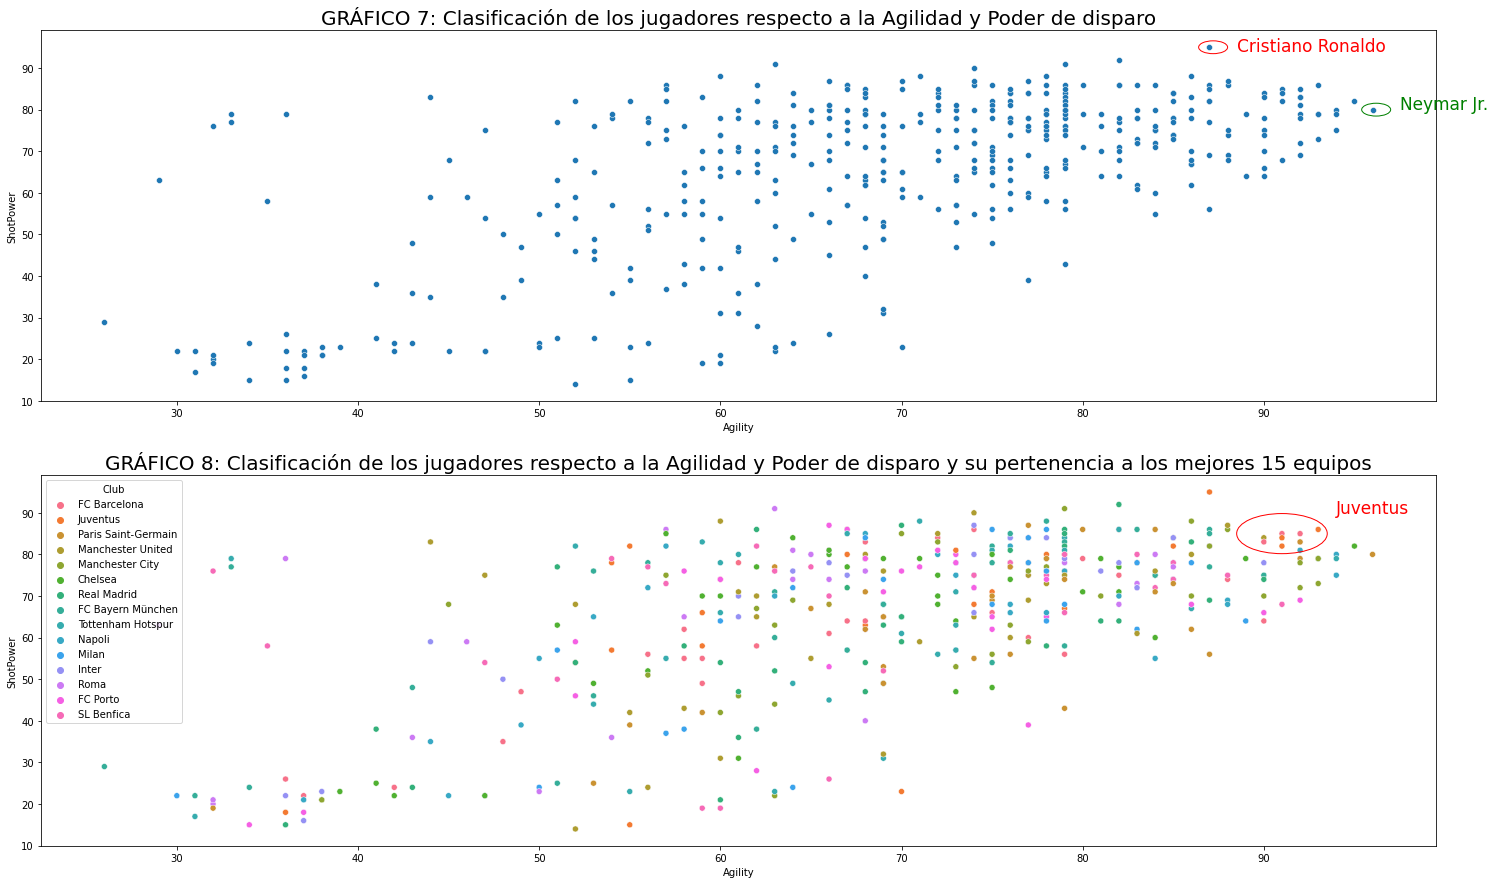

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

In [128]:
# Realizamos el subplot para representar los dos gráfico de puntos de nubes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,15))

# Colocamos primero el anterior gráfico de puntos realizado

plt.figure(figsize=(25,15))
ax = sns.scatterplot(ax = axes[0], data=filtered_df, x="Agility", y="ShotPower")

      # Se añaden el título del gráfico y los textos de los outlier
    
title_dict = {"size": 20}
axes[0].set_title("GRÁFICO 7: Clasificación de los jugadores respecto a la Agilidad y Poder de disparo", fontdict=title_dict)
fontdict = {"color": "red", "size":17}
axes[0].text(88.5, 94, "Cristiano Ronaldo", fontdict = fontdict)
fontdict = {"color": "green", "size":17}
axes[0].text(97.5, 80, "Neymar Jr.", fontdict = fontdict)

      # Se añaden los círculos para señalar los jugadores outlier

x_radius = 1.6
x_axis = axes[0].get_xlim()
y_axis = axes[0].get_ylim()
x_width = x_axis[0]-x_axis[1]
y_height = y_axis[0]-y_axis[1]
y_radius = x_radius*(y_height/x_width)*(25/15)


a = patches.Ellipse((87.2, 95), x_radius, y_radius, fill=False, color="red")
b = patches.Ellipse((96.2, 80), x_radius, y_radius, fill=False, color="green")
_ = axes[0].add_patch(a)
_ = axes[0].add_patch(b)

# A la anterior gráfica le añadimos la variable del equipo de fútbol en "hue" al gráfico de puntos de nubes

plt.figure(figsize=(25,15))
ax = sns.scatterplot(ax = axes[1], data=filtered_df, x="Agility", y="ShotPower", hue="Club")

    # Ponemos título al gráfico y nombre del equipo outlier

title_dict = {"size": 20}
axes[1].set_title("GRÁFICO 8: Clasificación de los jugadores respecto a la Agilidad y Poder de disparo y su pertenencia a los mejores 15 equipos", fontdict=title_dict)
fontdict = {"color": "red", "size":17}
axes[1].text(94, 90, "Juventus", fontdict = fontdict)

   # Se añaden los círculos para señalar el equipo outlier
    
x_radius = 5
x_axis = axes[0].get_xlim()
y_axis = axes[0].get_ylim()
x_width = x_axis[0]-x_axis[1]
y_height = y_axis[0]-y_axis[1]
y_radius = x_radius*(y_height/x_width)*(25/15)


a = patches.Ellipse((91, 85), x_radius, y_radius, fill=False, color="red")
_ = axes[1].add_patch(a)

En el caso antes comentado, los dos jugadores pertenecen a **equipos distintos** por lo que en términos generales **no podemos afirmar que exista** algún club con jugadores especialmente ágiles (`Agility`) y con un tiro potente (`ShotPower`). Que esto ocurra tiene sentido con la realidad porque, hablando de equipos grandes con altos presupuestos, los mejores jugadores se van moviendo entre diferentes clubes en las distintas temporadas de fichajes de invierno y verano siendo muy difícil que un equipo se quede con todos los mejores jugadores.

Destacar que hay un equipo que destaca ligeramente frente al resto que es la **Juventus**, con jugadores (más allá de Cristiano Ronaldo que pertenece a este equipo) con valores altos en estas dos variables marcados con círculos de color rojo siguiendo la leyenda del gráfico. Tienen lógica estos resultados ya que la Juventus era el **mejor equipo** partiendo de la media de sus jugadores u `Overall`.

# Ejercicio 10 (Conclusiones)

Finalmente, procedo a resumir los diferentes resultados obtenidos en este análisis:

- Para **conseguir el mayor beneficio**, se deberían incluir con más frecuencia en los sobres jugadores procedentes de los equipos con menor media de valor o `Overall` total. Así el jugador/a seguramente decidirá comprar más sobres con la intención de que consigan un jugador procedente aquellos equipos con mejor media de `Value` total , los cuales deberían aparecer con menor frecuencia.

- Respecto a las variables **Precisión con la cabeza** (`HeadingAccuracy`), **Salto** (`Jumping`), **Agilidad** (`Agility`), **Tiempo de reacción** (`Reaction`) y **Visión** (`Vision`); no se puede asegurar que podamos usar otra variable distinta a `HeadingAccuracy` para controlar la precisión de los remates de cabeza.

- Dado los mercados argentinos, españoles, ingleses y suecos, debería ser extraño que salieran en los sobres de Ultimate Team **Sergio Ramos, David de Egea, Zlatan Ibrahimović y Emil Forsberg**. Esa probabilidad de salir debería ser aún más extraña con **Lionel Messi y Harry Kane** al ser los outliers que destacan mayormente sobre el resto tanto en `Value` como en `Overall`.

- Entre los jugadores pertenecientes a Suecia y Argentina, la probabilidad de rareza **debería ser superior si se quiere obtener un jugador argentino**.

- El mejor jugador en cuanto a `Agility` es **Neymar Jr.** mientras que para `ShotPower` es **Cristiano Ronaldo**. Si lo visualizamos desde el punto de vista de los 15 mejores equipos en cuanto a su `Overall` observamos que, salvo ligeramente la Juventus, **no hay ningún equipo que destaque más que el resto en estas dos variables**.

Espero que les haya sido de ayuda este informe y deseo que sigan contando con mis servicios en futuros análisis de datos de la compañia. 